<h1><center><bold>Classification des Images avec Machine Learning : <br>Processus et Évaluation
</bold>

Prof : My Abdelouahed Sabri
abdelouahed.sabri@gmail.com

Vidéo Youtube: https://youtu.be/zsjGZHpKodY
</center></h1>

Table des matières
<ul>
1	Introduction</br>
2	Implémentation</br>
2.1	Préparation de la base d’images	</br>
2.2	Objectif	</br>
2.3	Extraction de caractéristiques (features extraction)	</br>
2.4	Apprentissage	</br>
2.1	Prédiction de la classe d’une nouvelle image	</br>
2.2	Evaluation du modèle de classification	</br>
2.3	Etude comparative avec d’autres algorithmes de classification	</br>
3	Conclusion	</br>



---
<h2>1	Introduction</h2>
L’objectif principal de cet atelier est de créer un système de classification d’images à base des algorithmes de Machine Learning et Data Mining. La classification est le processus de prédiction de la classe d’une image donnée. Les classes sont parfois appelées étiquettes ou catégories. Comme pour le CBIR, la classification sera effectuée en se basant sur le vecteur descripteur de l’image au lieu d’utiliser l’image. </br>
La classification peut être supervisée ou non supervisée ; pour la classification supervisée on dispose d’éléments déjà classés avec leurs étiquètes en avance alors que pour le cas de classification non supervisée les éléments ne sont pas classées et on cherche à les regrouper en classes. </br>
Dans cet atelier, notre objectif est de développer un système de classification supervisée. Dans ce système, deux parties (ou 3) seront élaborées :</br>
<ul> 1-	Apprentissage : Créer un modèle en se basant sur les descripteurs de la base d’images. Cette phase consiste en l’approximation d’une fonction de mappage entre la matrice de caractéristiques (variables d’entrées) et les étiquettes (variables de sorties)</br>
2-	Classification (prédiction) : prédire l’étiquette d’une nouvelle entrée (image) par le modèle élaboré. </ul></br></br>
La figure ci-dessous présente le schéma général du processus de classification

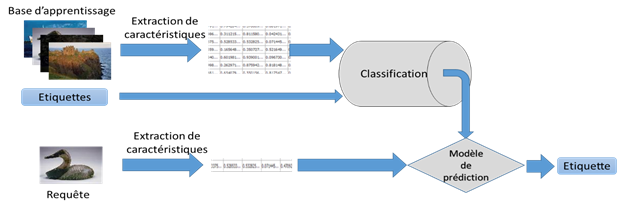

La validation ou l’évaluation d’un système de classification est effectuée en utilisant deux bases d’images :
1. Base d’apprentissage ou d’entrainement (training) =
2. Base de tests ou de validation.

Sachant que les images sont étiquetées au préalable, dans la base d’apprentissage les images et les étiquettes seront utilisées pour élaborer le modèle de classification alors que les images de la base de tests seront utilisées pour prédire les étiquettes de chaque image. Les étiquettes prédites seront comparées avec les étiquettes originelles pour mesurer la performance du modèle élaboré. La figure ci-dessous présente le schéma général du processus de classification/validation du modèle.


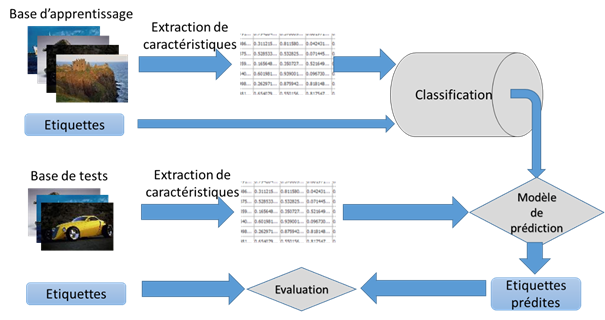

Une multitude d’algorithmes de classification supervisée ont été présentés dans la littérature. Ci-dessous une liste non exhaustive des méthodes les plus utilisées :<br>
<ul>
•	Machine à vecteurs de support (SVM ; Support Vector Machine)<br>
•	Classification naïve bayésienne<br>
•	Méthode des k plus proches voisins (KNN ; K-Nearest Neighbors)<br>
•	Arbre de décision<br>
•	Réseau de neurones<br>
•	…<br>


<h2>2	Implémentation</h2>
L’implémentation sera réalisée sous Python en utilisant une partie de la base de données d'images avec deux classes.
<h3>2.1 Base de données  CIFAR-10</h3>

La base de données CIFAR-10 est un ensemble de données largement utilisé en vision par ordinateur pour l'apprentissage supervisé. Elle contient un total de 60 000 images en couleur, chacune ayant une résolution de 32x32 pixels. Ces images sont réparties en 10 classes différentes, avec 6 000 images par classe.

Les dix classes de la base de données CIFAR-10 sont les suivantes :

1. Avion
2. Automobile
3. Oiseau
4. Chat
5. Cerf
6. Chien
7. Grenouille
8. Cheval
9. Navire
10. Camion

Chaque classe contient 6 000 images, ce qui donne un total de 60 000 images. Cela en fait une base de données polyvalente et populaire pour l'entraînement et l'évaluation des modèles d'apprentissage automatique dans le domaine de la vision par ordinateur. La diversité des classes permet de réaliser des tâches variées telles que la classification d'images et la détection d'objets.

Pour notre atelier de classification, nous allons utiliser seulement deux classes.

<h3>2.2 Préparation de la base d’images</h3>
Nous allons utiliser seulement les images appartenant à deux classes de la base CIFR-10.
Nous allons utiliser keras pour charger les images avec leurs étiquettes et après nous allons garder seulement les deux classes.
La dataset est proposée en deux parties ; une première partie pour l'entrainement et une pour la validation

In [ ]:
import keras

# Charger la base CIFAR-10
(img_train, y_train), (img_test, y_test) = keras.datasets.cifar10.load_data()
img_train=img_train.astype('float32')/ 255.0
img_test=img_test.astype('float32')/ 255.0

# Choisir les deux classes Oiseau (indice 2) et Camion (indice 5) pour une classification binaire
Classe1 = 2 # Pour la classe Oiseau
Classe2 = 9 # Pour la classe Camion

# Définir les étiquéttes pour les affichages
Etiquette_1 ="Oiseau"
Etiquette_2 ="Camion"

import numpy as np
# Récupérer les indices des images des deux classes dans la base d'apprentissage
class_1_train_index = np.where(y_train.reshape(-1) == Classe1)
class_2_train_index = np.where(y_train.reshape(-1) == Classe2)

# Récupérer les images de la première classe et leurs étiquettes de la base d'apprentissage
img_train_cls1 = img_train[class_1_train_index]
y_train_cls1= y_train[class_1_train_index]

# Récupérer les images de la deuxième classe et leurs étiquettes de la base d'apprentissage
img_train_cls2 = img_train[class_2_train_index]
y_train_cls2= y_train[class_2_train_index]

# Concaténer images et étiquettes de la base d'apprentissage
Image_train = np.concatenate((img_train_cls1, img_train_cls2))
y_train = np.array(np.concatenate((y_train_cls1, y_train_cls2)))

# Récupérer les indices des images des deux classes dans la base de validation
class_1_test_index = np.where(y_test.reshape(-1) == Classe1)
class_2_test_index = np.where(y_test.reshape(-1) == Classe2)

# Récupérer les images de la première classe et leurs étiquettes de la base de validation
img_test_cls1 = img_test[class_1_test_index]
y_test_cls1= y_test[class_1_test_index]

# Récupérer les images de la deuxième classe et leurs étiquettes de la base de validation
img_test_cls2 = img_test[class_2_test_index]
y_test_cls2= y_test[class_2_test_index]

# Concaténer les images et étiquettes de la base de validation
Image_test = np.concatenate((img_test_cls1, img_test_cls2))
y_test= np.array(np.concatenate((y_test_cls1, y_test_cls2)))

# Affichage de la taille des images d'apprentissage
print("Taille de la base d'apprentissage : ", Image_train.shape)
print("Nombre d'étiquettes de la base d'apprentissage :", y_train.shape)

# Affichage de la taille des images d'entrainement
print("Taille de la base de validation : ",Image_test.shape)
print("Nombre d'étiquettes de la base de validation :",y_test.shape)


170498071/170498071 [==============================] - 4s 0us/step
Taille de la base d'apprentissage :  (10000, 32, 32, 3)
Nombre d'étiquettes de la base d'apprentissage : (10000, 1)
Taille de la base de validation :  (2000, 32, 32, 3)
Nombre d'étiquettes de la base de validation : (2000, 1)


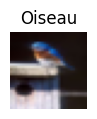

In [ ]:
# Afficher une image de la première classe
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))

plt.title(Etiquette_1)
plt.axis('off')
img=Image_train[1,:,:,:]
plt.imshow(img)

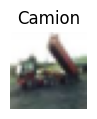

In [ ]:
# Afficher une image de la deuxième classe
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.title(Etiquette_2)
plt.axis('off')
img=Image_train[5001,:,:,:]
plt.imshow(img)

<h3>2.3	Objectif</h3>
L’objectif de la classification supervisée est de pouvoir prédire correctement la classe d’une (nouvelle) image à partir des connaissances (entrainement déjà établis en se basant sur les classes des images de la base). Ainsi, il faut établir un modèle de classification utilisant les deux classes de la base. Le classifieur choisi pour cette tâche est le SVM. <br>
Comme pour le CBIR, nous allons premièrement construire une matrice d’index à base des caractéristiques des images. Les caractéristiques choisies sont : Les moments statistiques de couleurs dans l’espace RGB, l’histogramme de couleurs dans l’espace HSV, les mesures statistiques de la matrice GLCM et les les motifs binaires locaux (Local Binary Pattern, LBP) pour la texture, et les moments de Hu pour la forme (voir atelier CBIR). Cette matrice de caractéristiques (Features) sera passée avec les étiquettes (classes) au classifieur pour concevoir un modèle de classification qui sera utilisé pour la prédiction (voir Figure. 1)

<h3>2.4	Extraction de caractéristiques (features extraction)</h3>
La première étape du processus de classification et l’extraction de caractéristiques. Ainsi, il faut identifier pour chaque image le vecteur descripteur et sa classe.

In [ ]:
import cv2 as cv
import numpy as np
from sklearn import preprocessing
# Extraction des caactèristiques de couleurs: Moments Statistiques dans l'espace RGB
def color_Moments(img):
  R = img[..., 0]
  G = img[..., 1]
  B = img[..., 2]
  colorFeatures = [np.mean(R),np.std(R),np.mean(G),np.std(G),np.mean(B),np.std(B)]
  colorFeatures /= np.mean(colorFeatures)
  return colorFeatures
# Extraction des caactèristiques de couleurs: Histogramme quantifié dans l'espace HSV
def hsvHistogramFeatures(image):
    [rows,cols,dd] = np.shape(image)
    # convertir l'image RGB en HSV.
    imageHSV = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    # commenter ces 3 lignes pour un calcul sans méthodes
    hist = cv.calcHist([image], [0,1,2],None, [8, 2, 2],[0,180,0,256,0,256])
    hist=hist.flatten()
    hist/=np.sum(hist)
    return hist.reshape(-1)
# Extraction des caractéristiques de Texture : Contraste, Corrélation, Energie, Homogénéité
# à partir de la matrice GLCM
from skimage.feature import graycomatrix, graycoprops
def  textureFeatures(img):
    im = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    im=im.astype('uint8')
    v = []
    glcm = graycomatrix(im, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    v.append(graycoprops(glcm, 'contrast')[0][0])
    v.append(graycoprops(glcm, 'correlation')[0][0])
    v.append(graycoprops(glcm, 'energy')[0][0])
    v.append(graycoprops(glcm, 'homogeneity')[0][0])
    v /= np.sum(v)
    return v
# Extraction des caractéristiques de Texture : Local Binary Pattern (LBP)
from skimage.feature import local_binary_pattern
def lbp_histogram(color_image):
  im = cv.cvtColor(color_image, cv.COLOR_RGB2GRAY)
  patterns = local_binary_pattern(im, 8, 3)
  hist, _ = np.histogram(patterns, bins=np.arange(2**5 + 1), density=True)
  hist/= np.mean(hist)
  return hist

# Extraction des caractéristiques de forme: Moments de Hu
def shapeFeatures(img):
    im = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    shapeFeat = cv.HuMoments(cv.moments(im)).flatten()
    shapeFeat /= np.mean(shapeFeat)
    return shapeFeat
# Fonction pour l'extraction des caractèristiques
def getFeatures(img):
    img=  cv.resize(img, (32, 32))
    fsize=81 # 81 représente le nombre de caractèristiques à extraire de chque image
    features = np.zeros((fsize,1))
    # Extraction des caactèristiques de couleurs
    # Moments Statistiques dans l'espace RGB
    features = color_Moments(img)
    # Historgamme quantifié dans l'espace HSV
    features = np.concatenate((features, hsvHistogramFeatures(img)), axis=None)
    # Extraction des caractèristiques de texture utilisant GLCM
    features = np.concatenate((features, textureFeatures(img)), axis=None)
    # Extraction des caractèristiques de forme utilisant les moments de Hu
    features = np.concatenate((features, shapeFeatures(img)), axis=None)
    # Extraction des caractèristiques de texture utilisant LBP
    features = np.concatenate((features, lbp_histogram(img)), axis=None)
    # Normalisation
    features /=np.mean(features)
    return features

In [ ]:
# Extraire les caractèristiques de la base d'apprentissage
X_train = np.array([getFeatures(img) for img in Image_train])

# Extraire les caractèristiques de la base de validation
X_test = np.array([getFeatures(img) for img in Image_test])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 81)
(10000, 1)
(2000, 81)
(2000, 1)


<h3>2.5	Apprentissage</h3>
La matrice de caractéristiques avec les étiquettes de la base d'apprentissage seront passées en arguments au classificateur SVM pour créer notre modèle de classification.
Nous avons utilisé comme paramètres de SVM le kernel RBF et C=1. Ce sont les valeurs les plus utilisées.

In [ ]:
# Apprentissage utilisant L’SVM
# Créer le modéle SVM
from sklearn import svm

# Créer l'objet du modéle
model = svm.SVC(C=1,kernel='rbf')

# Lancer l'entrainement
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

<h3>2.6	Prédiction de la classe d’une nouvelle image</h3>
Ici nous allons prédire la classe d’une nouvelle image (non utilisée dans l’apprentissage). L'image à utiliser pour la prédiction se trouve dans la base de validation X_test

Pour cette image il faut premièrement extraire le vecteur descripteur et l’utiliser pour identifier sa classe.


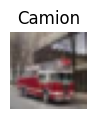

In [ ]:
# Prédire la classe d'une nouvelle image
# Logiquement, l'image ne doit pas être utilisée pour l'apprentissage
# Nous allons utiliser une image à partir de la base de validation

# Nous allons choisir une image d'une manière aléatoire
import random
index = random.randint(0,Image_test.shape[0]-1)

Ireq=Image_test[index]
# print(Ireq.shape)
features = []
features.append(getFeatures(Ireq))
prediction = model.predict(features)

prediction =Etiquette_1 if prediction ==Classe1  else Etiquette_2

# Afficher l'image originale et sa classe prédite
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.title(prediction)
plt.axis('off')
plt.imshow(Ireq)

On remarque que le modèle de classification crée à base de l’algorithme SVM a pu prédire correctement la classe de l’image requête. <br>

Nous allons par la suite prédire les classes de toutes les images dans le dossier DataToPredict et afficher les images avec leurs prédictions.

L’évaluation ici du résultat de classification est effectuée visuellement en affichant l’image et sa classe. Mais si on veut évaluer réellement notre modèle de classification, il faut tester avec plusieurs images et voir le nombre de fois le modèle a pu classifier correctement et incorrectement des images.

<h3>2.7	Evaluation du modèle de classification</h3>
Nous allons utiliser la base de validation (X_test, y_test) pour évaluer notre modèle. Alors, nous allons utiliser notre modèle pour prédire les classes des images de la base de test et les comparer avec les classes réelles (y_test).

Les mesures les plus utilisées pour l’évaluation d’un modèle de classification sont : Sensibilité (taux de TP), Spécificité (taux de TN) et de précision (accuracy).<br>
<center>
Recall or Sensitivity=TP/ (TP + FN) <br>
Specificity =TN/ (FP + TN) <br>
Accuracy= (TP+TN)/ (TP+TN+FP+FN) <br>
Precision = TP /  (TP+FP) <br>
F-score or F-mesure =2*(Presion*Recall) / (Precision+ Recall) <br>

</center>
Avec :<ul>
•	TP: nombre de « True Positives ». C’est le nombre d’images classées par le modèle dans la classe « obj_car » qui appartiennent effectivement à cette classe<br>
•	TN: nombre de « True Negatives. C’est le nombre d’images classées par le modèle dans la classe « obj_ship » qui appartiennent effectivement à cette classe<br>
•	FP: nombre de « False Positives » : C’est le nombre d’images qui sont classées par le modèle dans la classe « obj_car » alors  et qu’elles appartiennent à la classe « obj_ship »<br>
•	FN: nombre de « False Negatives ». C’est le nombre d’images qui sont classées par le modèle dans la classe « obj_ship » alors  et qu’elles appartiennent à la classe « obj_car »<br>
Aussi, on peut utiliser la matrice de confusion pour évaluer facilement un modèle de classification. Cette matrice permet de visualiser facilement le nombre de TP, TN, FP et FN<br>

Nous allons commencer par afficher la matrice de confusion

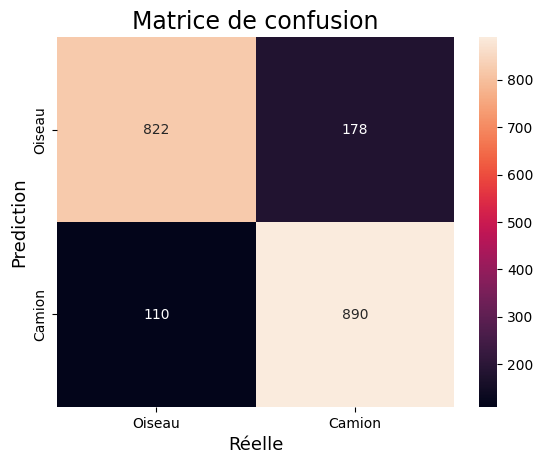

In [ ]:
# Prédire les classes de la partie de test
predicted_test=model.predict(X_test)

# Calculer et afficher les mesures d'évaluation
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test,predicted_test)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[Etiquette_1,Etiquette_2],
            yticklabels=[Etiquette_1,Etiquette_2])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Réelle',fontsize=13)
plt.title('Matrice de confusion',fontsize=17)
plt.show()

In [ ]:
# Afficher les mesures TP, TN, FP et FN à partir de la matrice de confusion
tp, fp, fn, tn = cm.reshape(-1)
print('TP : ', tp)
print('TN : ', tn)
print('FP : ', fp)
print('FN : ', fn)

TP :  822
TN :  890
FP :  110
FN :  178


Par la suite, nous allons afficher les mesures de performances du modèle, à savoir : l'Accuracy, Le Rappel (Recall), la précision et le F1-Score qui est plus significative que l'accuracy parce que la base n'est pas équilibrée.

In [ ]:
# Rapport de classification pour precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
rapport = classification_report(y_test,predicted_test)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)

# Afficher les mesures d'évaluation
import sklearn.metrics as metrics
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_test))
print("Recall : ", metrics.recall_score(y_test, predicted_test, average='macro'))
print("Precision: ", metrics.precision_score(y_test, predicted_test, average='macro'))
print("F1 score: ", metrics.f1_score(y_test, predicted_test, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           2       0.88      0.82      0.85      1000
           9       0.83      0.89      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy:  0.856
Recall :  0.856
Precision:  0.857653791130186
F1 score:  0.8558333433449066


<h3>2.8	Etude comparative avec d’autres algorithmes de classification</h3>
La classification repose essentiellement sur trois paramètres ; la base de données, le choix des caractéristiques et l’algorithme de classification. Dans la partie précédente, le SVM a été choisi comme algorithme de classification alors qu’il existe d’autres algorithmes de classification que nous pouvons utiliser.

Le choix est fortement lié au type d’images et à la taille de la base. Dans ce qui suit nous allons élaborer une étude comparative en termes d’accuracy pour différent algorithmes de classification à savoir : SVM (avec différents kernels), KNN (avec diffèrentes valeurs de K), et l’arbre de décision (Decision Trees).<br>

Nous allons précéder successivement pour chaque algorithme de classification par créer un modèle de classification et après faire la prédiction et à la fin calculer et afficher l’accuracy de classification

In [ ]:
# SVM RBF
# pour plus de détails sur les paramétres de SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
modelSVM_RBF = svm.SVC(C=1,kernel='rbf',gamma='auto', class_weight='balanced')
# Apprentissage
trained_ModelRBF=modelSVM_RBF.fit(X_train,y_train)
# Calculer l'accuracy de classification
svm_RBF_score=trained_ModelRBF.score(X_test, y_test)
print("SVM RBF Accuracy: ",svm_RBF_score )

#SVM linear
modelSVM_ln = svm.SVC(C=1,kernel='linear',gamma='auto', class_weight='balanced')
# Apprentissage
trained_ModelLin=modelSVM_ln.fit(X_train,y_train)
# Calculer l'accuracy de classification
svm_Linear_score=trained_ModelLin.score(X_test, y_test)
print("SVM linear Accuracy: ",svm_Linear_score )

#SVM sigmoid
modelSVM_sigm = svm.SVC(C=1,kernel='sigmoid',gamma='auto', class_weight='balanced')
# Apprentissage
trained_ModelSVMsig=modelSVM_sigm.fit(X_train,y_train)
# Calculer l'accuracy de classification
svm_sigmoid_score=trained_ModelSVMsig.score(X_test, y_test)
print("SVM sigmoid Accuracy: ",svm_sigmoid_score )

# KNN 3
# Pour plus d'informations sur le KNN:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=3)
trained_ModelKNN3=modelKNN.fit(X_train,y_train)
knn_3_score=trained_ModelKNN3.score(X_test, y_test)
print("KNN neigbors 3 Accuracy: ", knn_3_score)

# KNN 5
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
trained_ModelKNN5=modelKNN.fit(X_train,y_train)
knn_5_score=trained_ModelKNN5.score(X_test, y_test)
print("KNN neigbors 5 Accuracy: ",knn_5_score )

# DT
# pour plus d'information sur les paramétres de DT:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn import tree
modelDT = tree.DecisionTreeClassifier()
trained_Model_DT=modelDT.fit(X_train,y_train)
dt_score=trained_Model_DT.score(X_test, y_test)
print("Decision Tree Accuracy: ", dt_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM RBF Accuracy:  0.868


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM linear Accuracy:  0.8655


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM sigmoid Accuracy:  0.508


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN neigbors 3 Accuracy:  0.776


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN neigbors 5 Accuracy:  0.7935
Decision Tree Accuracy:  0.8085


In [ ]:
# Afficher sous format de tableau
from tabulate import tabulate
data=[[svm_RBF_score, svm_Linear_score, svm_sigmoid_score, knn_3_score, knn_5_score,dt_score]]
print (tabulate(data, headers=["SVM RBF", "SVM linear", "SVM sigmoid", "KNN 3", "KNN 5", "DT"]))


  SVM RBF    SVM linear    SVM sigmoid    KNN 3    KNN 5      DT
---------  ------------  -------------  -------  -------  ------
    0.868        0.8655          0.508    0.776   0.7935  0.8085


l'arbre de décision a montré la meilleure performance suivie du SVM avec noyau RBF. L'algorithme SVM avec noyau sigmoïde a montré la performance la moins satisfaisante parmi ceux évalués. Il est important de considérer ces résultats lors du choix de l'algorithme approprié pour la classification d'images dans votre étude comparative.

1. SVM (Support Vector Machine): La SVM avec un noyau RBF est souvent efficace pour des problèmes de classification non linéaires. Elle crée des frontières de décision complexes en utilisant des fonctions de base radiales, ce qui peut bien s'adapter à des données non linéaires.
SVM avec Kernel Linéaire.
L'algorithme SVM avec un noyau linéaire crée des frontières de décision linéaires. Il est particulièrement efficace lorsque les données sont linéairement séparables, ce qui peut expliquer sa performance relativement élevée. Le noyau sigmoïde de la SVM est généralement moins performant dans la plupart des cas. Il est souvent utilisé pour des problèmes de classification binaire simples et ne fonctionne pas aussi bien pour des données complexes.

2. KNN (k-Nearest Neighbors):
KNN est un algorithme simple basé sur la similarité des voisins les plus proches. Il attribue une classe à un point basé sur la majorité de ses voisins. Dans ce cas, KNN avec 3 et 5 voisins a montré de bonnes performances pour la classification.
Arbre de Décision

3. Arbre de décision:
L'arbre de décision divise récursivement les données en fonction de caractéristiques importantes, créant des décisions en forme d'arbre. C'est un algorithme populaire et puissant pour la classification, car il peut gérer des ensembles de données complexes en prenant des décisions basées sur des caractéristiques discriminantes.

<h2>3	Conclusion</h2>
Dans cet atelier, nous avons exploré le processus de classification d'images en utilisant des techniques de machine learning. Nous avons débuté par l'étape cruciale de l'extraction des caractéristiques des images, où nous avons transformé des images brutes en représentations numériques significatives, indispensables pour l'entraînement de nos modèles.

Par la suite, nous avons entrepris une étude comparative approfondie en utilisant trois familles d'algorithmes de classification largement reconnus : SVM (Support Vector Machine) avec différents kernels (RBF, linéaire, sigmoïde), KNN (k-Nearest Neighbors) avec différents voisins, et les arbres de décision. Cette comparaison visait à évaluer et comprendre la performance et les caractéristiques distinctives de chaque algorithme dans la classification des images.

Nos résultats ont révélé que l'algorithme des SVM avec le noyaux RBF a surperformé les autres méthodes, obtenant la plus haute précision parmi les modèles évalués. Il a été suivi par le SVM avec noyau linéaire, montrant une performance solide. Les DT et KNN avec 5 et 3 voisins ont également affiché des performances respectables. Cependant, le SVM avec noyau sigmoïde a démontré des résultats moins satisfaisants en termes de précision.

Il est crucial de noter que le choix de l'algorithme dépend fortement de divers facteurs, tels que la nature des données, la non-linéarité de la tâche, et les ressources disponibles. Choisir le bon algorithme est essentiel pour obtenir les meilleurs résultats de classification d'images.

En fin de compte, cet atelier a permis de souligner l'importance de l'extraction des caractéristiques et de la sélection judicieuse de l'algorithme de classification, offrant ainsi un aperçu précieux aux participants sur la manière d'aborder des problèmes de classification d'images avec des techniques de machine learning.